In [15]:
import datetime as dt

import plotly.express as px
import polars as pl

from stocksense.config import config
from stocksense.database_handler import DatabaseHandler
from stocksense.model import XGBoostRegressor
from stocksense.pipeline import clean, engineer_features

features = config.model.features
target = "fsharpe_ratio"
date_col = config.model.date_col
aux_cols = ["tic", "datadate", "rdq"]
target

'fsharpe_ratio'

In [10]:
constituents = DatabaseHandler().fetch_constituents(dt.datetime(2022, 6, 1))

2024-12-02 19:33:20.479 | SUCCESS  | stocksense.database_handler.schema:create_tables:121 - Tables created successfully


In [10]:
DatabaseHandler().fetch_stock().filter(pl.col("tic") == "ZTS")

2024-12-02 09:44:29.546 | SUCCESS  | stocksense.database_handler.schema:create_tables:121 - Tables created successfully


tic,name,sector,date_added,date_removed
str,str,str,date,date
"""ZTS""","""Zoetis""","""Health Care""",2013-06-21,null


In [11]:
data = engineer_features()
data = clean(data)
data.head()

2024-12-02 19:33:25.729 | INFO     | stocksense.pipeline.preprocess:engineer_features:20 - START processing stock data
2024-12-02 19:33:25.731 | SUCCESS  | stocksense.database_handler.schema:create_tables:121 - Tables created successfully
2024-12-02 19:33:28.811 | INFO     | stocksense.pipeline.preprocess:engineer_features:33 - START feature engineering
2024-12-02 19:33:30.220 | SUCCESS  | stocksense.pipeline.preprocess:engineer_features:46 - END 48239 rows PROCESSED
2024-12-02 19:33:30.222 | INFO     | stocksense.pipeline.preprocess:clean:68 - START cleaning data
2024-12-02 19:33:30.341 | SUCCESS  | stocksense.pipeline.preprocess:clean:92 - 41635 rows retained after CLEANING


tic,datadate,rdq,saleq,cogsq,xsgaq,niq,ebitdaq,cshoq,actq,atq,cheq,rectq,invtq,ppentq,lctq,dlttq,ltq,req,seqq,oancfq,ivncfq,fincfq,dvq,capxq,icaptq,surprise_pct,tdq,stock_split,n_purch,val_purch,n_sales,val_sales,insider_balance,roa,roi,roe,…,dr_yoy,dr_2y,ltda_yoy,ltda_2y,pe_yoy,pe_2y,pb_yoy,pb_2y,ps_yoy,ps_2y,eps_yoy,eps_2y,ev_ebitda_yoy,ev_ebitda_2y,ltcr_yoy,itr_yoy,rtr_yoy,atr_yoy,f_score,f_score_gr1,f_score_gr4,index_freturn,freturn,excess_return,forward_vol,fsharpe_ratio,sector_communication_services,sector_consumer_discretionary,sector_consumer_staples,sector_energy,sector_financials,sector_health_care,sector_industrials,sector_information_technology,sector_materials,sector_real_estate,sector_utilities
str,date,date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,date,i8,u32,f64,u32,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i8,i8,i8,f64,f64,f64,f64,f64,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8
"""A""",2007-01-31,2007-02-15,1280.0,540.0,564.0,150.0,176.0,405.0,3749.0,7193.0,2090.0,671.0,648.0,775.0,1372.0,1500.0,3536.0,1705.0,3657.0,93.0,-93.0,-169.0,0.0,37.0,5157.0,0.011,2007-03-01,0,0,0.0,1,8.598,8.598,0.089114,0.029087,0.17528,…,2.640314,3.928494,11.580703,29.655039,282.560607,null,-7.754803,9.151709,-19.208201,null,-77.612898,null,-42.418432,null,131.460674,25.76978,22.719366,11.302357,7,1,null,-5.169725,-2.63992,2.529806,0.017808,1.420582,0,0,0,0,0,1,0,0,0,0,0
"""A""",2007-04-30,2007-05-14,1320.0,540.0,586.0,123.0,194.0,395.958,3791.0,7283.0,2050.0,718.0,650.0,777.0,1554.0,1500.0,3728.0,1881.0,3555.0,302.0,-36.0,-320.0,0.0,42.0,5055.0,-0.023,2007-06-01,0,0,0.0,3,2.695,2.695,0.089112,0.024332,0.18256,…,3.544885,9.453423,10.627489,30.16614,378.903526,null,16.399931,38.944827,-0.630294,null,-77.181676,null,-27.569721,null,7.883817,19.259654,24.025332,18.364403,7,0,null,-8.849601,-2.324975,6.524626,0.019274,3.385156,0,0,0,0,0,1,0,0,0,0,0
"""A""",2007-07-31,2007-08-14,1374.0,563.0,580.0,185.0,231.0,386.548,3281.0,7024.0,1486.0,738.0,674.0,787.0,1510.0,1500.0,3736.0,2069.0,3288.0,176.0,-258.0,-484.0,0.0,36.0,4788.0,-0.01,2007-09-01,0,0,0.0,2,5.747,5.747,0.086418,0.038638,0.184611,…,4.419175,14.878382,10.037016,36.525701,472.325667,null,25.872772,5.91443,3.996541,null,-79.822287,null,-14.222296,null,2000.0,18.769156,29.327755,22.359853,6,-1,null,-12.968883,-4.505469,8.463414,0.017724,4.775133,0,0,0,0,0,1,0,0,0,0,0
"""A""",2007-10-31,2007-11-15,1446.0,611.0,598.0,180.0,237.0,370.0,3671.0,7554.0,1826.0,735.0,643.0,801.0,1663.0,2087.0,4320.0,2580.0,3234.0,398.0,-69.0,-7.0,0.0,39.0,5321.0,0.022,2007-12-01,0,0,0.0,2,2.75,2.75,0.084459,0.033828,0.197279,…,13.590344,46.46352,35.725911,2000.0,456.222783,-60.359786,21.410892,-1.590112,-1.541225,-26.668893,-78.726207,165.240102,-5.153189,-45.143381,-32.276673,10.125696,14.20785,12.76951,5,-1,-1,-44.893122,-54.374837,-9.481715,0.030042,-3.15613,0,0,0,0,0,1,0,0,0,0,0
"""A""",2008-01-31,2008-02-13,1393.0,580.0,617.0,120.0,196.0,368.0,5070.0,7459.0,3148.0,726.0,674.0,801.0,2674.0,626.0,4286.0,2657.0,3173.0,4.0,-295.0,-168.0,0.0,34.0,3799.0,0.021,2008-03-01,0,0,0.0,2,3.418,3.418,0.081512,0.031587,0.191617,…,16.887848,19.974054,-59.754945,-55.094284,-6.732989,256.802843,1.959688,-5.947085,-18.681512,-34.301331,4.388523,-76.630435,-23.738073,-56.087186,-228.366043,5.357524,1.528223,5.558859,6,1,-1,-44.756241,-54.688029,-9.931787,0.032388,-3.066549,0,0,0,0,0,1,0,0,0,0,0


In [14]:
data.filter(pl.col("tic") == "BRK-B").tail()

tic,datadate,rdq,saleq,cogsq,xsgaq,niq,ebitdaq,cshoq,actq,atq,cheq,rectq,invtq,ppentq,lctq,dlttq,ltq,req,seqq,oancfq,ivncfq,fincfq,dvq,capxq,icaptq,surprise_pct,tdq,stock_split,n_purch,val_purch,n_sales,val_sales,insider_balance,roa,roi,roe,…,dr_yoy,dr_2y,ltda_yoy,ltda_2y,pe_yoy,pe_2y,pb_yoy,pb_2y,ps_yoy,ps_2y,eps_yoy,eps_2y,ev_ebitda_yoy,ev_ebitda_2y,ltcr_yoy,itr_yoy,rtr_yoy,atr_yoy,f_score,f_score_gr1,f_score_gr4,index_freturn,freturn,excess_return,forward_vol,fsharpe_ratio,sector_communication_services,sector_consumer_discretionary,sector_consumer_staples,sector_energy,sector_financials,sector_health_care,sector_industrials,sector_information_technology,sector_materials,sector_real_estate,sector_utilities
str,date,date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,date,i8,u32,f64,u32,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i8,i8,i8,f64,f64,f64,f64,f64,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8
"""BRK-B""",2023-09-30,2023-11-04,63432.0,0.0,6609.0,-12767.0,0.0,1.446,0.0,1.019933e6,157241.0,52726.0,0.0,211498.0,0.0,122257.0,485206.0,569776.0,525330.0,13669.0,-28048.0,-4636.0,0.0,5303.0,650111.0,0.081,2023-12-01,0,0,0.0,0,0.0,0.0,0.075312,-0.019638,0.146219,…,-2.121923,-3.281593,-5.689586,-6.789834,177.369949,-99.938019,-3.290404,-99.932179,-50.293424,-99.940502,246.121438,2000.0,2000.0,2000.0,3.420891,NaN,-13.962413,-12.146771,4,-1,0,31.291966,35.27319,3.981224,0.009025,4.411099,0,0,0,0,1,0,0,0,0,0,0
"""BRK-B""",2023-12-31,2024-02-24,130190.0,0.0,8492.0,37574.0,0.0,1.441,0.0,1.069978e6,167641.0,44200.0,0.0,216593.0,0.0,122936.0,499208.0,607350.0,561273.0,14400.0,-7351.0,-136.0,0.0,5708.0,689544.0,-0.013,2024-03-01,0,0,0.0,0,0.0,0.0,0.08993,0.054491,0.171437,…,-5.413461,-3.763817,-9.426779,-10.100548,173.574152,-99.929731,11.071455,-99.927462,-41.884593,-99.936381,281.646938,2000.0,2000.0,2000.0,50.720876,NaN,35.828509,24.467176,5,1,1,null,null,null,null,null,0,0,0,0,1,0,0,0,0,0,0
"""BRK-B""",2024-03-31,2024-05-04,91745.0,0.0,6464.0,12702.0,0.0,1.437,0.0,1.070035e6,188993.0,52835.0,0.0,217500.0,0.0,120096.0,492250.0,619925.0,571490.0,10566.0,-3203.0,-9802.0,0.0,4393.0,694244.0,0.137,2024-06-01,0,0,0.0,0,0.0,0.0,0.068616,0.018296,0.128473,…,-4.602067,-8.355429,-7.285809,-6.846231,-87.492739,-99.993477,13.565623,-99.927337,-11.692911,-99.934676,925.400862,2000.0,NaN,2000.0,24.580268,NaN,-20.687847,-30.581505,4,-1,-3,null,null,null,null,null,0,0,0,0,1,0,0,0,0,0,0
"""BRK-B""",2024-06-30,2024-08-05,117510.0,0.0,6934.0,30348.0,0.0,1.437,0.0,1.10886e6,276942.0,52469.0,0.0,219469.0,0.0,121374.0,500889.0,650273.0,601697.0,13602.0,-7448.0,854.0,0.0,4535.0,725325.0,0.1185,2024-09-01,0,0,0.0,0,0.0,0.0,0.061195,0.041841,0.112776,…,-3.943874,-6.635365,-6.764849,-14.762251,66.858078,193.821313,18.25792,27.423081,29.960845,-24.588835,-21.308712,279.606333,NaN,2000.0,17.883025,NaN,-7.444285,-12.438138,3,-1,-2,null,null,null,null,null,0,0,0,0,1,0,0,0,0,0,0
"""BRK-B""",2024-09-30,2024-11-04,113509.0,0.0,9098.0,26251.0,0.0,1.438,0.0,1.147251e6,325212.0,52046.0,0.0,222272.0,0.0,122483.0,515445.0,676524.0,629069.0,1803.0,-3904.0,-3065.0,0.0,4701.0,753576.0,0.0,2024-12-01,0,0,0.0,0,0.0,0.0,0.093157,0.034835,0.169894,…,-5.557088,-7.561095,-10.933317,-16.000842,-3.314594,174.805449,13.854629,10.108352,19.324915,-40.687671,39.910661,304.43947,NaN,2000.0,-134.576294,NaN,78.719953,63.510645,5,2,1,null,null,null,null,null,0,0,0,0,1,0,0,0,0,0,0


In [5]:
df = data.to_pandas()
df_standardized = (df[features] - df[features].mean()) / df[features].std()
corr = df_standardized.corrwith(df[target])
corr_df = pl.DataFrame({"Feature": corr.index, "Correlation": corr.values}).sort(
    "Correlation", descending=False
)

fig = px.bar(
    corr_df,
    x="Correlation",
    y="Feature",
    orientation="h",
    title=f"Feature Correlations with Target ({target})",
    width=1000,
    height=1200,
)
fig.update_layout(yaxis={"tickfont": {"size": 10}}, showlegend=False, margin={"l": 200})
fig.add_vline(x=0, line_dash="dash", line_color="gray")
fig.show()

In [5]:
data = data.select(["tic", date_col] + features + [target])
data = data.filter((~pl.all_horizontal(pl.col(target).is_null())))
train = data.filter((pl.col("tdq").dt.year() >= 2007) & (pl.col("tdq").dt.year() <= 2021))
val = data.filter(
    (pl.col("tdq").dt.year() >= 2022)
    & (pl.col("tdq").dt.year() <= 2023)
    & pl.col("tic").is_in(constituents)
)

X_train = train.select(features).to_pandas()
y_train = train.select(target).to_pandas().values.ravel()
X_val = val.select(features).to_pandas()
y_val = val.select(target).to_pandas().values.ravel()

params = {
    "objective": "reg:squarederror",
    "learning_rate": 0.2,
    "n_estimators": 700,
    "max_depth": 3,
    "min_child_weight": 8,
    "gamma": 0.1,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "reg_alpha": 0.1,
    "reg_lambda": 2,
    "eval_metric": "rmse",
    "nthread": -1,
    "seed": 100,
}

model = XGBoostRegressor(params)
model.train(X_train, y_train)

print(f"RMSE: {model.get_rmse(X_val, y_val)}")
print(f"MAE: {model.get_mae(X_val, y_val)}")

RMSE: 11.686172666455777
MAE: 8.552481332403948


In [6]:
y_pred = model.predict(X_val)
val_subset = val.with_columns(pl.Series("pred", y_pred)).sort("pred", descending=True)
n = 100
top = val_subset.head(n)
bottom = val_subset.tail(n)

top_freturn = top.select(pl.col(target)).mean().item()
bottom_freturn = bottom.select(pl.col(target)).mean().item()
freturn = val_subset.select(pl.col(target)).mean().item()

print(f"Average freturn: {freturn:.2f}%")

print(f"\nTop {n} stocks:")
print(f"Average freturn: {top_freturn:.2f}%")
print(f"\nBottom {n} stocks:")
print(f"Average freturn: {bottom_freturn:.2f}%")

Average freturn: 1.77%

Top 100 stocks:
Average freturn: 3.52%

Bottom 100 stocks:
Average freturn: -2.33%


In [7]:
top

tic,tdq,n_purch,n_sales,insider_balance,volume_ma20,volume_ma50,price_mom,price_qoq,price_yoy,price_2y,rsi_14d,rsi_30d,rsi_60d,rsi_90d,rsi_1y,vol_mom,vol_qoq,vol_yoy,rel_vol_mom,rel_vol_qoq,rel_vol_yoy,momentum_mom,momentum_qoq,momentum_yoy,momentum_2y,fear_ma30,high_fear,low_fear,gpm,roa,roe,ebitdam,size,earn_drift,pe,pb,…,ltq_yoy,ltq_2y,dlttq_yoy,gpm_yoy,gpm_2y,roa_yoy,roa_2y,roi_yoy,roi_2y,roe_yoy,fcf_yoy,cr_yoy,qr_yoy,der_yoy,dr_yoy,dr_2y,ltda_yoy,ev_ebitda_yoy,ltcr_yoy,pe_yoy,pe_2y,pb_yoy,ps_yoy,atr_yoy,sector_utilities,sector_health_care,sector_financials,sector_consumer_discretionary,sector_consumer_staples,sector_energy,sector_industrials,sector_information_technology,sector_communication_services,sector_materials,sector_real_estate,fsharpe_ratio,pred
str,date,u32,u32,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i8,i8,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,f64,f32
"""CAH""",2023-09-01,1,6,11.795,98.439187,87.653153,-6.601253,3.8416,23.840498,66.850827,43.123265,46.841274,51.247423,52.881723,53.410387,1.638176,1.287009,1.450021,217.600605,194.687006,127.327179,-2000.0,70.959146,168.142317,-2000.0,15.335333,0,1,0.03418,0.006011,-0.091515,0.01246,10.678606,-3.301312,84.224446,-7.710481,…,3.77714,8.460114,-17.444562,0.309022,-1.317239,128.271306,-56.263849,-201.794844,-315.471282,-106.924909,-78.576203,-6.892034,-8.716676,74.310428,4.879041,11.048148,-16.567991,-94.179707,-74.0492,494.915584,234.041745,72.642865,-2.268416,12.428576,0,1,0,0,0,0,0,0,0,0,0,4.704094,22.952963
"""DD""",2023-12-01,0,2,4.181,90.041982,92.460424,8.203834,-4.673506,2.694655,-2.095721,57.551678,50.86842,50.215884,50.531899,50.376508,1.043051,1.478947,1.515306,152.457264,181.338552,174.146671,97.448486,-161.590903,21.368451,-346.406065,15.644333,0,1,0.343891,0.11567,0.180645,0.253717,10.616364,-3.16929,-27.537818,1.251766,…,-83.184786,-23.427588,-71.776646,2.160734,-3.273157,1078.769519,236.362624,-472.329325,-161.924752,895.485945,185.758514,81.419944,98.465772,-35.795401,-23.974392,-14.801297,27.604537,-76.281511,403.856565,-100.06517,-385.704281,-78.89434,-134.931955,146.8511,0,0,0,0,0,0,0,0,0,1,0,-0.815949,22.252796
"""MCK""",2023-09-01,0,11,23.044,78.169773,80.522144,-5.235337,6.010902,12.354222,101.98883,42.325837,49.714807,52.76776,53.442467,54.524921,1.35853,1.315472,1.377412,180.454878,198.992757,120.951347,-1698.062802,111.028859,87.131887,-2000.0,15.335333,0,1,0.040573,0.058506,-2.340824,0.018112,11.068137,-0.176728,14.833464,-44.859266,…,2.46052,3.808449,-53.658738,-9.869654,-16.132149,161.076698,181.825123,211.066655,515.369239,-146.826138,-24.973433,-2.186508,7.885571,5.854004,-0.418464,1.861717,-54.960857,-33.408408,-169.680685,-60.990155,307.854268,-24.395936,-0.962994,10.191644,0,1,0,0,0,0,0,0,0,0,0,8.86386,21.496553
"""MRNA""",2023-09-01,0,26,70.258,102.484139,88.851944,2.373807,-11.300239,-14.901343,-70.118666,50.913246,47.04835,45.564943,45.984132,48.931594,3.695789,2.68485,3.263193,490.915367,406.139756,286.542819,769.935741,-208.72951,-105.096222,2000.0,15.335333,0,1,-1.125,0.055154,0.071214,-5.159884,9.993511,2.373807,35.530538,2.530259,…,-38.756515,-47.772251,-100.0,-258.629008,-235.911487,-89.780239,-74.509017,-169.028116,-120.595325,-90.88739,-477.960526,70.455801,79.043464,-35.013035,-27.117343,-61.449697,-100.0,1154.070595,-2000.0,757.748695,-26.112002,-21.836707,58.985387,-91.55306,0,1,0,0,0,0,0,0,0,0,0,-20.979886,20.000088
"""CEG""",2023-09-01,0,0,0.0,74.371701,82.61656,6.080682,19.810159,31.498965,null,63.568916,65.02562,62.282831,59.895967,56.399479,1.222031,1.302335,1.844865,162.323633,197.005443,161.998644,1972.247298,365.918332,222.15597,null,15.335333,0,1,0.198678,0.016624,0.068763,0.346676,10.748476,6.080682,44.634858,2.975145,…,2.954867,2000.0,36.587531,-44.518402,-62.597034,17.021567,null,734.856198,NaN,21.606448,-1042.105263,5.336141,-17.94509

In [8]:
for date in ["2022-03-01", "2022-06-01", "2022-09-01", "2022-12-01", "2023-03-01", "2023-06-01"]:
    y_pred = model.predict(X_val)
    val_subset = (
        val.with_columns(pl.Series("pred", y_pred))
        .filter(pl.col("tdq") == pl.lit(date).str.to_date())
        .sort("pred", descending=True)
    )
    n = 10
    top = val_subset.head(n)
    bottom = val_subset.tail(n)

    # Calculate average returns for top stocks
    top_freturn = top.select(pl.col(target)).mean().item()

    # Calculate average returns for bottom stocks
    bottom_freturn = bottom.select(pl.col(target)).mean().item()

    print(f"\nDATE {date}")
    print(f"\nTop {n} stocks:")
    print(f"Average freturn: {top_freturn:.2f}%")
    print(f"\nBottom {n} stocks:")
    print(f"Average freturn: {bottom_freturn:.2f}%")


DATE 2022-03-01

Top 10 stocks:
Average freturn: 10.54%

Bottom 10 stocks:
Average freturn: 1.89%

DATE 2022-06-01

Top 10 stocks:
Average freturn: 5.72%

Bottom 10 stocks:
Average freturn: -3.69%

DATE 2022-09-01

Top 10 stocks:
Average freturn: -4.63%

Bottom 10 stocks:
Average freturn: -5.09%

DATE 2022-12-01

Top 10 stocks:
Average freturn: 0.31%

Bottom 10 stocks:
Average freturn: -8.12%

DATE 2023-03-01

Top 10 stocks:
Average freturn: -1.03%

Bottom 10 stocks:
Average freturn: -4.99%

DATE 2023-06-01

Top 10 stocks:
Average freturn: 15.49%

Bottom 10 stocks:
Average freturn: -3.72%


In [9]:
model.get_importance("gain")

[('roa', 9141.6796875),
 ('ltda_yoy', 7336.1884765625),
 ('dlttq_yoy', 7226.97802734375),
 ('dr_2y', 6391.59375),
 ('rsi_1y', 5896.60400390625),
 ('vol_qoq', 5376.8681640625),
 ('fear_ma30', 5319.7021484375),
 ('momentum_yoy', 5151.6484375),
 ('vol_yoy', 5047.22265625),
 ('sector_industrials', 5039.11328125),
 ('rel_vol_yoy', 4566.4736328125),
 ('sector_financials', 4464.21142578125),
 ('ltq_yoy', 4355.0390625),
 ('high_fear', 4283.8359375),
 ('roe_yoy', 4204.80078125),
 ('earn_drift', 4193.7451171875),
 ('price_qoq', 4102.51220703125),
 ('vol_mom', 3887.006591796875),
 ('ps', 3732.25830078125),
 ('rel_vol_mom', 3606.025146484375),
 ('size', 3592.743896484375),
 ('der_yoy', 3464.278564453125),
 ('volume_ma50', 3388.26953125),
 ('volume_ma20', 3238.918701171875),
 ('sector_energy', 3231.3857421875),
 ('rel_vol_qoq', 3129.753662109375),
 ('qr_yoy', 2900.425048828125),
 ('ps_yoy', 2826.821044921875),
 ('dr_yoy', 2731.16650390625),
 ('price_yoy', 2713.44921875),
 ('f_score', 2711.216064453

In [10]:
model.get_importance("weight")

[('fear_ma30', 222.0),
 ('vol_qoq', 151.0),
 ('rel_vol_yoy', 148.0),
 ('size', 146.0),
 ('ps', 140.0),
 ('vol_mom', 128.0),
 ('vol_yoy', 128.0),
 ('momentum_2y', 124.0),
 ('rel_vol_mom', 113.0),
 ('rel_vol_qoq', 112.0),
 ('rsi_1y', 109.0),
 ('roa', 105.0),
 ('pb', 96.0),
 ('dr_2y', 92.0),
 ('dlttq_yoy', 91.0),
 ('price_2y', 89.0),
 ('ebitdam', 89.0),
 ('gpm', 87.0),
 ('ev_ebitda', 83.0),
 ('pe_2y', 81.0),
 ('roe', 79.0),
 ('momentum_yoy', 73.0),
 ('pe', 71.0),
 ('price_yoy', 70.0),
 ('saleq_2y', 70.0),
 ('ev_ebitda_yoy', 70.0),
 ('qr_yoy', 69.0),
 ('saleq_yoy', 67.0),
 ('ltq_2y', 67.0),
 ('price_qoq', 66.0),
 ('cr_yoy', 66.0),
 ('ltda_yoy', 66.0),
 ('roa_2y', 64.0),
 ('gpm_yoy', 63.0),
 ('volume_ma20', 61.0),
 ('gpm_2y', 61.0),
 ('dr_yoy', 59.0),
 ('momentum_qoq', 58.0),
 ('ps_yoy', 58.0),
 ('atr_yoy', 58.0),
 ('price_mom', 57.0),
 ('earn_drift', 55.0),
 ('ltcr_yoy', 54.0),
 ('fcf_yoy', 53.0),
 ('volume_ma50', 52.0),
 ('rsi_14d', 52.0),
 ('ltq_yoy', 51.0),
 ('der_yoy', 51.0),
 ('moment

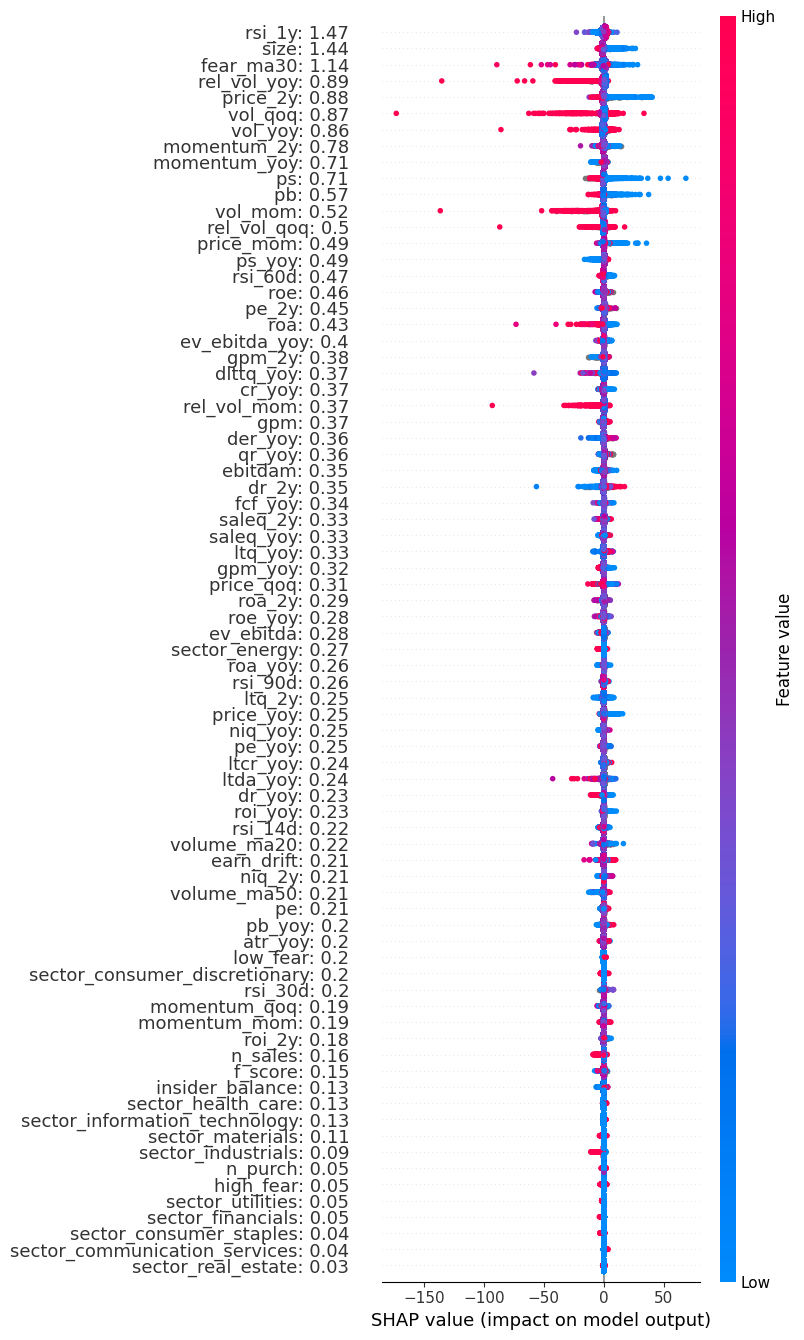

In [11]:
import numpy as np
import shap

explainer = shap.TreeExplainer(model.model)
shap_values = explainer(X_train)

feature_names = [
    a + ": " + str(b)
    for a, b in zip(X_train.columns, np.abs(shap_values.values).mean(0).round(2), strict=False)
]

shap.summary_plot(
    shap_values,
    X_train,
    max_display=X_train.shape[1],
    feature_names=feature_names,
    plot_size=(8, 13.5),
)